<a href="https://colab.research.google.com/github/abhi0928/git-github/blob/master/BlackFriday06oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Essential libraries
import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set_context('talk')
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
display(train.head(), train.shape)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


(550068, 12)

In [4]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

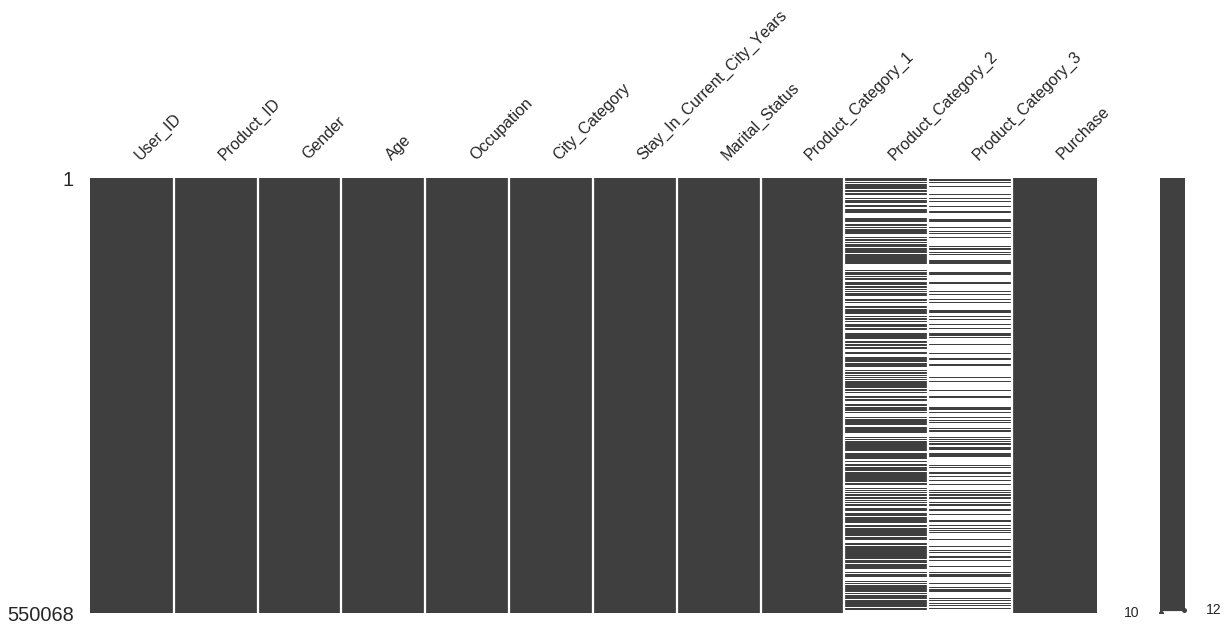

In [5]:
msno.matrix(train, figsize = (20, 8))

In [6]:
display(test.head(), test.shape)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


(233599, 11)

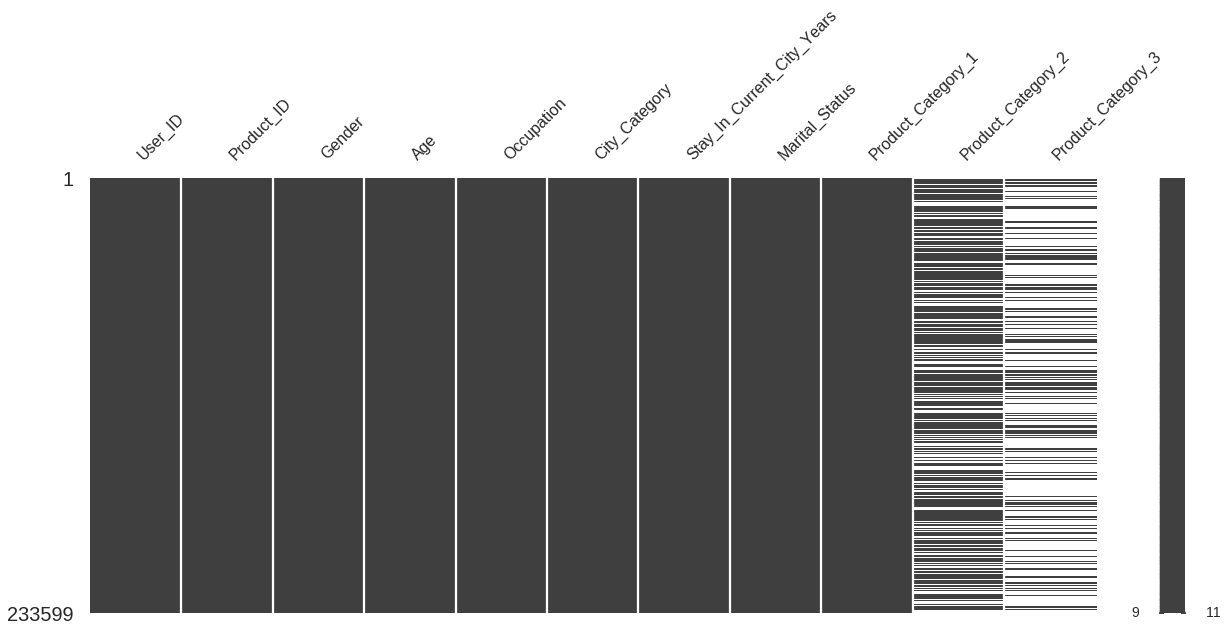

In [7]:
msno.matrix(test, figsize = (20, 8))

## Merge the train and test

In [0]:
data = pd.concat([train, test], sort = False)

In [9]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
data.shape

(783667, 12)

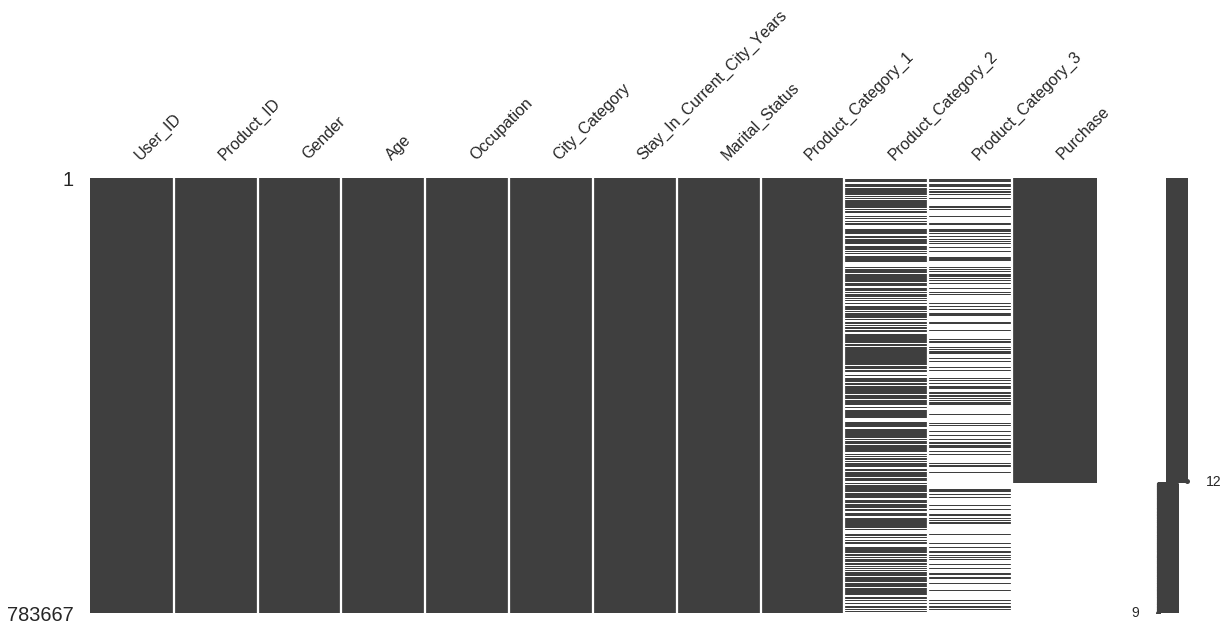

In [11]:
msno.matrix(data, figsize = (20, 8))

In [0]:
# removing User_ID and Product_ID
data.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 65.8+ MB


In [0]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+', '')

In [0]:
data['Stay_In_Current_City_Years'] = pd.to_numeric(data['Stay_In_Current_City_Years'])

In [0]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mean())
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mean())

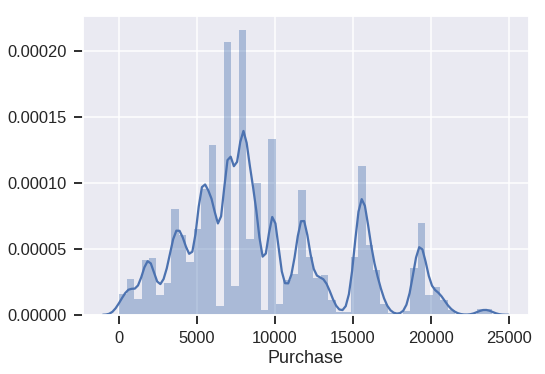

In [17]:
sns.distplot(train['Purchase'])

In [18]:
data.skew().sort_values(ascending = False)

Product_Category_1            0.986594
Purchase                      0.600140
Occupation                    0.399767
Marital_Status                0.366914
Stay_In_Current_City_Years    0.318568
Product_Category_2           -0.197919
Product_Category_3           -1.390412
dtype: float64

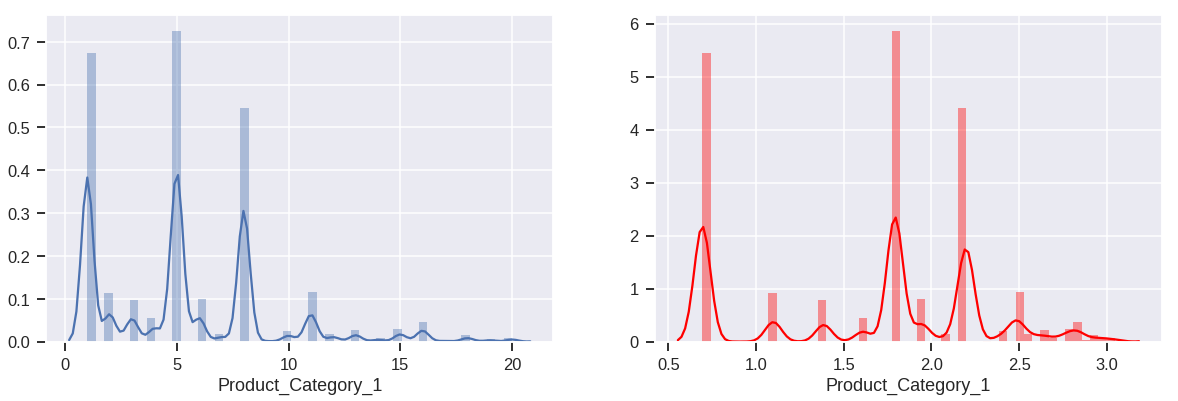

In [19]:
plt.figure(figsize = (20, 6))
plt.subplot2grid((1, 2), (0, 0))
sns.distplot(data['Product_Category_1'])

plt.subplot2grid((1, 2), (0, 1))
sns.distplot(np.log1p(data['Product_Category_1']), color = 'red')

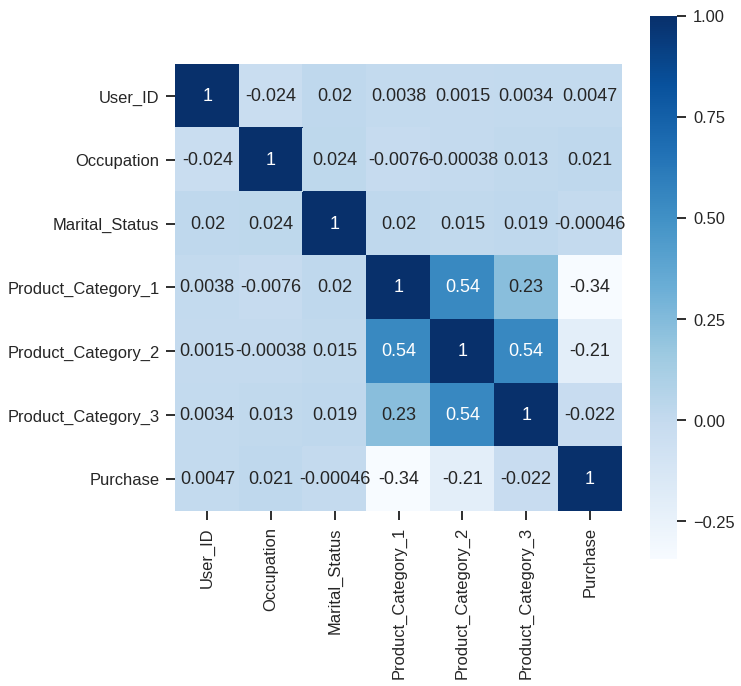

In [20]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), annot = True, square = True, cmap = 'Blues')

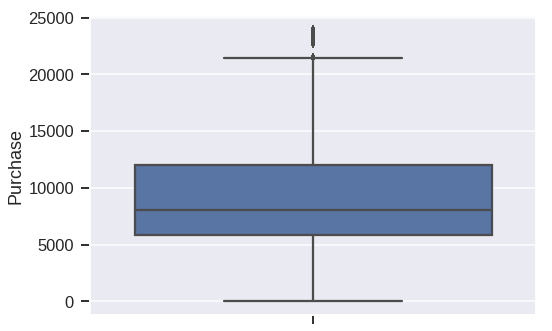

In [21]:
sns.boxplot(train['Purchase'], orient = 'v')

In [0]:
# detection of outliers by interquantile range

outlier = []

q1, q3 = np.percentile(train['Purchase'], [25, 70])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [23]:
lower_bound, upper_bound

(-2734.5, 20085.5)

In [24]:
len(train[train['Purchase'] > 20085].index)

12015

In [0]:
train.drop(train[train['Purchase'] > 20085].index, inplace = True)

In [0]:
data.drop(data[data['Purchase'] > 20085].index, inplace = True)

In [27]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.844506,12.668605,8370.0
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200.0
2,F,0-17,10,A,2,0,12,9.844506,12.668605,1422.0
3,F,0-17,10,A,2,0,12,14.000000,12.668605,1057.0
4,M,55+,16,C,4,0,8,9.844506,12.668605,7969.0


In [28]:
data.Age.value_counts()

26-35    306236
36-45    153292
18-25    139124
46-50     63892
51-55     53325
55+       29802
0-17      20891
Name: Age, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
data['Gender'] = le.fit_transform(data['Gender'])

In [0]:
city_categories = pd.get_dummies(data['City_Category'])

In [0]:
data.drop(['City_Category'], axis = 1, inplace = True)

In [0]:
city_categories = city_categories.drop('A', axis = 1)

In [0]:
data = pd.concat([city_categories, data], axis = 1)

In [37]:
data.head()

,B,C,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0-17,10,2,0,3,9.844506,12.668605,8370.0
1,0,0,0,0-17,10,2,0,1,6.000000,14.000000,15200.0
2,0,0,0,0-17,10,2,0,12,9.844506,12.668605,1422.0
3,0,0,0,0-17,10,2,0,12,14.000000,12.668605,1057.0
4,0,1,1,55+,16,4,0,8,9.844506,12.668605,7969.0


In [0]:
age = pd.get_dummies(data['Age'])

In [0]:
age = age.drop('55+', axis = 1)

In [0]:
data.drop('Age', axis = 1, inplace = True)

In [0]:
data = pd.concat([age, data], axis = 1)

In [44]:
data.head()

,0-17,18-25,26-35,36-45,46-50,51-55,B,C,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,0,0,0,0,0,0,0,10,2,0,3,9.844506,12.668605,8370.0
1,1,0,0,0,0,0,0,0,0,10,2,0,1,6.000000,14.000000,15200.0
2,1,0,0,0,0,0,0,0,0,10,2,0,12,9.844506,12.668605,1422.0
3,1,0,0,0,0,0,0,0,0,10,2,0,12,14.000000,12.668605,1057.0
4,0,0,0,0,0,0,0,1,1,16,4,0,8,9.844506,12.668605,7969.0


In [0]:
data['Product_Category_1'] = np.log1p(data['Product_Category_1'])

In [0]:
X_train = data[: train.shape[0]]
X_test = data[train.shape[0] :]

In [0]:
X_train.drop(['Purchase'], axis = 1, inplace = True)

In [53]:
X_test.drop(['Purchase'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
y = X_train['Purchase']

In [58]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')